# Sheet 3: Probabilistic Classification

## Question 1.1

we have categorical and numerical data so we bin the numerical data into categorical data. Let's denote the range (20-30) as Young (Y), (30-40) as Middle (M), and (40>) as Old (O).

And the data become as follows:

|$x_i$|Age|Car|Class|
|:----:|:---:|:---:|:---:|
|$x_1$|Y|sports|L|
|$x_2$|Y|vintage|H|
|$x_3$|Y|sports|L|
|$x_4$|O|SUV|H|
|$x_5$|Y|sports|H|
|$x_6$|Y|SUV|H|

Using the Full Bayes approach, the probabilities are
$$P(L\lvert(23, truck)) = P(L\lvert(Y,truck)) \propto P((Y,truck)\lvert L)\cdot P(L) =\frac{0+1}{2+4\times3}\times\frac{2}{6}=\frac{1}{42}$$

$$P(H\lvert(23, truck)) =P(H\lvert(Y,truck)) \propto P((Y,truck)\lvert H)\cdot P(H) =\frac{0+1}{4+4\times3}\times\frac{4}{6}=\frac{1}{24}$$

The point is therefore classified as class H.

Using the Naive Bayes approach, the probabilities are
$$P(L\lvert(23, truck)) = P(L\lvert(Y,truck)) \propto P(Y\lvert L)\cdot P(truck\lvert L) \cdot P(L) =\frac{2}{2}\times\frac{0+1}{2+4}\times\frac{2}{6}=\frac{1}{18}$$


$$P(H\lvert(23, truck)) =P(H\lvert(Y,truck)) \propto P(Y\lvert H)\cdot P(truck\lvert H) \cdot P(H) =\frac{3}{4}\times\frac{0+1}{4+4}\times\frac{4}{6}=\frac{1}{16}$$

The point is therefore classified as class H.


## Question 1.2

Again for the numerical data we convert it to categorical. Here we consider each number as a separate category for simplicity, and so $\lvert Dom(a_3)\rvert = 7$

Given the data point (T, F, 1.0) we classify it by the calculating the following probabilities.

$$ \begin{equation}
\begin{split}
P(Y\lvert (T,F,1.0))
& = P(a_1=T\lvert Y)\cdot P(a_2=F\lvert Y)\cdot P(a_3=1.0\lvert Y) \cdot P(Y) \\
& = \frac{3}{4} \times \frac{2}{4} \times \frac{0+1}{4+7}\times \frac{4}{9} \\ & = \frac{1}{66}
\end{split}
\end{equation}
$$


$$ \begin{equation}
\begin{split}
P(N\lvert (T,F,1.0))
& = P(a_1=T\lvert N)\cdot P(a_2=F\lvert N)\cdot P(a_3=1.0\lvert N) \cdot P(N) \\
& = \frac{1}{5} \times \frac{2}{5} \times \frac{2}{5}\times \frac{5}{9} \\ & = \frac{4}{225}
\end{split}
\end{equation}
$$

The point is therefore classified as class N.


## Question 1.3

Probability of the sample $(3,4)$ belongs to class 1

$$ P(C_1|(3,4)) = f_1(x)P(c_1) $$

$$ \Sigma = \begin{bmatrix} 
5 & 3 \\
3 & 2 \\
\end{bmatrix}
$$

$$ |\Sigma| = 1 $$

$$ \Sigma^{-1} = \begin{bmatrix} 
2 & -3 \\
-3 & 5 \\
\end{bmatrix}
$$

$$(x-u_1)^T \Sigma^{-1}(x-u_1) = \begin{bmatrix} 2  & 1 \\ \end{bmatrix} \begin{bmatrix} 2 & -3 \\-3 & 5 \\ \end{bmatrix} \begin{bmatrix} 2 \\ 1 \\ \end{bmatrix} = 1$$



$$f_1(x) = \frac{1}{2\pi\sqrt{1}}e^{-\frac{1}{2}}$$

$$P(c_1|x) = 0.5 \times \frac{1}{2\pi}e^{-\frac{1}{2}} = 0.04827$$

Probability of the sample $(3,4)$ belongs to class 2

$$ P(C_2|(3,4)) = f_2(x)P(c_2) $$

$$ \Sigma = \begin{bmatrix} 
2 & 0 \\
0 & 1 \\
\end{bmatrix}
$$

$$ |\Sigma| = 2 $$

$$ \Sigma^{-1} = \frac{1}{2}\begin{bmatrix} 1 & 0 \\ 0 & 2 \\ \end{bmatrix} = \begin{bmatrix}  0.5 & 0 \\ 0 & 1 \\ \end{bmatrix}$$

$$(x-u_2)^T \Sigma^{-1}(x-u_2) = \begin{bmatrix} -2 & -1 \\ \end{bmatrix} \begin{bmatrix} 0.5 & 0 \\0 & 1 \\ \end{bmatrix} \begin{bmatrix} -2 \\ -1 \\ \end{bmatrix} = 3$$



$$f_1(x) = \frac{1}{2\pi\sqrt{2}}e^{-\frac{3}{2}}$$

$$P(c_1|x) = 0.5 \times \frac{1}{2\pi\sqrt{2}}e^{-\frac{3}{2}} = 0.01256$$

$P(c_1|x)$ is greater than $P(c_2|x)$ so the point is classified as class 1

## Question 2

In [2]:
import numpy as np
import re
from matplotlib import pyplot as plt
import os
from numpy import linalg
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from math import sqrt,exp,pi
import itertools

from mpmath import mpf, mpc, mp
mpf.dps = 1000

# print images/plots in the notebook itself
%matplotlib inline

In [166]:
# reference:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes):
    org_size = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = (16, 14)

    cmap=plt.cm.Blues
    title = 'Confusion Matrix'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(int(cm[i, j])),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    # restore orginal plotting size
    plt.rcParams['figure.figsize'] = org_size


In [9]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


In [11]:
# import the face data
images = []
labels = []

# path to dataset
path = '../face recognition assignment/orl_faces'
dirnames = os.listdir(path)
dirnames.remove('README')

# sort directories by number to get the labels vector correct
dirnames.sort(key=lambda f: int(filter(str.isdigit, f)))

idx = 1
# for each folder (person), read his 10 images
for person_dir in dirnames:
    person_dir = os.path.join(path, person_dir)
    for img_file in os.listdir(person_dir):
        img = read_pgm(os.path.join(person_dir, img_file))
        img_vec = np.hstack(img)
        images.append(img_vec)
        labels.append(idx)
    idx += 1


In [19]:
train_data = images[0::2]
test_data = images[1::2]
train_labels = labels[0::2]
test_labels = labels[1::2]

In [27]:
def list_to_dict(li):
    dct = {}
    for item in li:
        if item in dct:
            continue
        else:
            dct[item] = []
    return dct

In [58]:
# returns a dict of labels (class names) to a 3-tuples, where each tuple
# is of the form (class_prior, class_mean, class_variance).
# The code implements the algorithm in the book
def NaiveBayes(data, labels):
    # build class-specific subsets
    class_data = list_to_dict(labels)
    for i in range(len(data)):
        label = labels[i]
        class_data[label].append(data[i])
    
    # Convert class-specific subsets to np matrix
    for label in class_data:
        temp = class_data[label]
        class_data[label] = np.array(temp).reshape(len(temp), len(temp[0]))
    
    model = list_to_dict(labels)
    
    for label in class_data:
        subset = class_data[label]
        class_size = len(subset)
        class_prior = float(class_size)/len(data)
        class_mean = np.mean(subset, axis = 0)
        class_centered_data = subset - class_mean
        class_variance = []
        dimensions = len(data[0])
        for d in range(dimensions):
            # get the d_th dimension vector (of the i_th class)
            class_dim_d = class_centered_data[:,d]
            # calculate the variance in the d_th dimension
            var_i_d = class_dim_d.dot(class_dim_d.T)/class_size
            class_variance.append(var_i_d)
        class_variance = np.array(class_variance).T
        
        model[label] = (class_prior, class_mean, class_variance)
    
    return model


In [137]:
def gaussian_prob(variance_vec, centered_data_vec):
    assert len(variance_vec) == len(centered_data_vec)
    # floating point with very high precision to store the very small probabilities
    prob = mpf(1)
    for d in range(len(variance_vec)):
        point = centered_data_vec[d]
        var = variance_vec[d]
        # we ignore the case where the variance is zero
        # since it will cause division by zero or make
        # the probability zero if the point doesn't match the mean exactly
        if var == 0:
            continue
        else:
            prob *= mpf(math.exp((-1*point**2)/(2*var))/sqrt(2*pi*var))
    return prob

In [217]:
def Naive_Classify(model, data_point):
    best_match_label = -1
    best_prob = -1
    
    for label in model:
        (prior, mean, variance) = model[label]
        centered_point = data_point - mean
        prob = mpf(prior) * mpf(gaussian_prob(variance, centered_point))
        print prob
        if prob > best_prob:
            best_prob = prob
            best_match_label = label
    
    return best_match_label

### Fitting the model

In [59]:
model = NaiveBayes(train_data, train_labels)

(0.025, array([ 51.6,  51. ,  43. , ...,  64.2,  57.2,  62. ]), array([   69.04,    30.8 ,   110.8 , ...,  2223.76,  2454.16,  2911.6 ]))


### Classifying using the Naive Bayes on the full data (unprojected)

In [141]:
correct = 0
conf_matrix = np.zeros([41, 41])
for i in range(len(test_data)):
    predicted = Naive_Classify(model, test_data[i])
    actual = test_labels[i]
    conf_matrix[predicted][actual] += 1
    print "predicted {}, actual is {}".format(predicted, actual)
    if predicted == actual:
        correct += 1

predicted 1, actual is 1
predicted 1, actual is 1
predicted 1, actual is 1
predicted 1, actual is 1
predicted 1, actual is 1
predicted 36, actual is 2
predicted 2, actual is 2
predicted 36, actual is 2
predicted 36, actual is 2
predicted 36, actual is 2
predicted 3, actual is 3
predicted 3, actual is 3
predicted 28, actual is 3
predicted 3, actual is 3
predicted 3, actual is 3
predicted 36, actual is 4
predicted 4, actual is 4
predicted 3, actual is 4
predicted 4, actual is 4
predicted 16, actual is 4
predicted 5, actual is 5
predicted 5, actual is 5
predicted 5, actual is 5
predicted 5, actual is 5
predicted 5, actual is 5
predicted 6, actual is 6
predicted 6, actual is 6
predicted 6, actual is 6
predicted 1, actual is 6
predicted 1, actual is 6
predicted 36, actual is 7
predicted 36, actual is 7
predicted 36, actual is 7
predicted 36, actual is 7
predicted 7, actual is 7
predicted 8, actual is 8
predicted 8, actual is 8
predicted 8, actual is 8
predicted 8, actual is 8
predicted 8, a

In [193]:
print "accuracy: {}".format(100*(correct/float(len(test_data))))

accuracy: 66.5


In [142]:
conf = np.delete(conf_matrix, 0, 0)
conf = np.delete(conf, 0, 1)

In [143]:
print conf.shape

(40L, 40L)


In [150]:
plt.rcParams['figure.figsize'] = (16, 14)


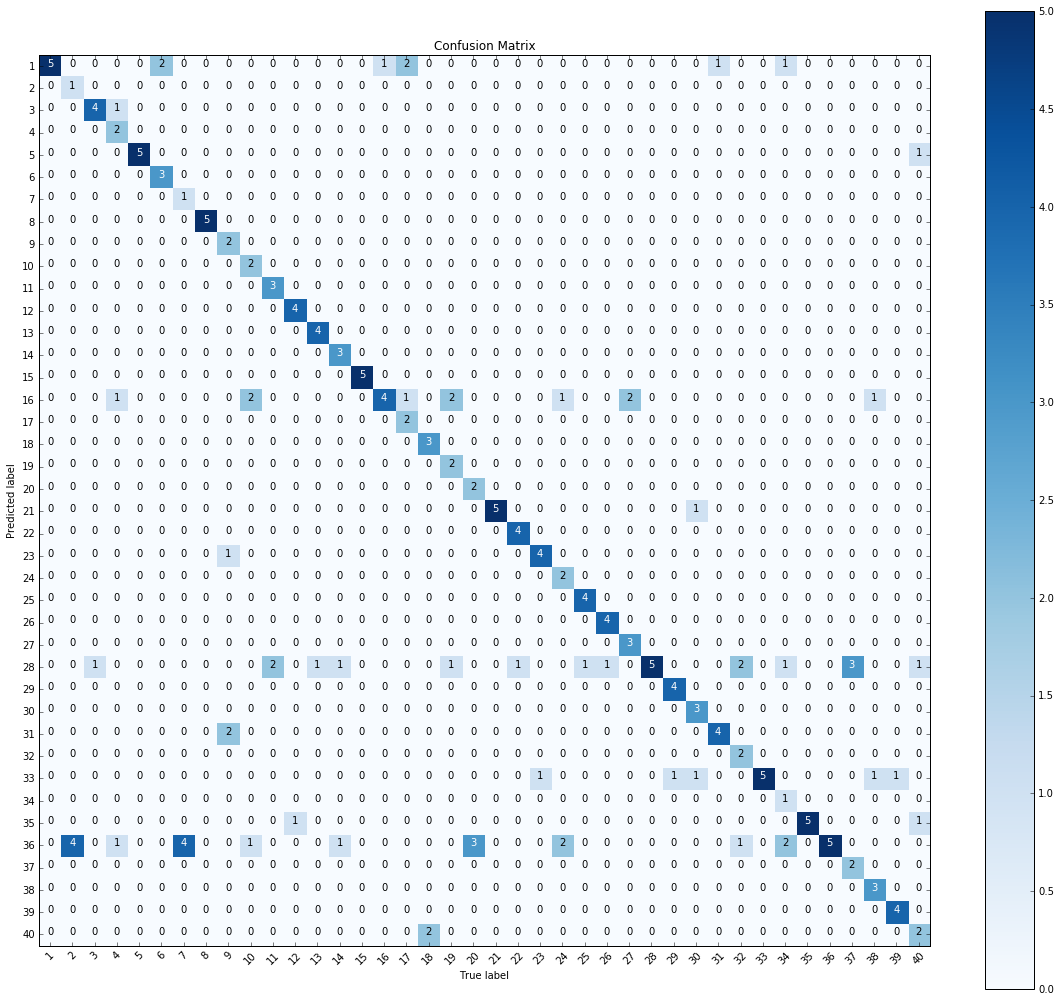

In [155]:
class_labels = range(1, 41)
plot_confusion_matrix(conf, class_labels)

The accuarcy of the Naive Classifier is small, $66.5\%$, which is expected because each dimensions represents a pixel. We are comparing the indvidual pixels of the unlabeled image with each class. Individual pixels don't have a meaning and they don't reflect similarity and therefore the accuracy will be small. More over, the naive bayes classifier also ignores covariance between dimensions, which  For example, variations in the background of the photos of the faces can serverely reduce the classification accuracy since the varitions in the pixel of the background will affect the probability of the given unlabeled image belonging to a specific class.

The confusion matrix, as expected, has it highest values in the diagonals as they show matches of the predicted and actual values. Also from the matrix we can see that images of classes (persons) 1, 16, 28, and 36 confuses the classifer.

Although projecting to 40 dimensions will only explain $81.5\%$ of the variance (as shown later), we should expect to get a much better accuracy after projecting the data into a lower dimension using PCA, since each component (dimension) in the reduced space have a meaning (eigenfaces). Also, these are components which have the most variance. Each dimensions represents an eigenface, and therefore when we compare two images, we are comparing there components on the eigenfaces, not the individual pixels.

In [156]:
# faces of people that confuse the classifier
# plt.rcParams['figure.figsize'] = (8, 6)

# plt.imshow(images[(1-1)*10].reshape(112, 92), plt.cm.gray)
# plt.show()
# plt.imshow(images[(16-1)*10].reshape(112, 92), plt.cm.gray)
# plt.show()
# plt.imshow(images[(28-1)*10].reshape(112, 92), plt.cm.gray)
# plt.show()
# plt.imshow(images[(36-1)*10].reshape(112, 92), plt.cm.gray)
# plt.show()

### Projecting the data using PCA before classification

In [124]:
def project(prj_mat, train_data, test_data):
    prj_mat = prj_mat.T

    prj_train = np.dot(train_data, prj_mat)
    prj_test = np.dot(test_data, prj_mat)
    return prj_train, prj_test

In [125]:
def center_data(train_data):
    mean = np.mean(train_data, axis=0)
    centered_data = train_data - mean
    return mean, centered_data

In [126]:
mean, images_centered = center_data(train_data)

In [128]:
covariance = (images_centered.T.dot(images_centered))/len(train_data)

In [129]:
pca_evalues, pca_evectors = linalg.eigh(covariance)

In [130]:
idx = pca_evalues.argsort()[::-1]
pca_evalues = pca_evalues[idx]
pca_evectors = pca_evectors[:,idx]

In [132]:
prj_mat = np.vstack(pca_evectors.T[0:40])
prj_train, prj_test = project(prj_mat, train_data, test_data)

In [157]:
exp_var = sum(pca_evalues[0:40])/sum(pca_evalues)
print "epxlained variance: {}".format(exp_var)

epxlained variance: 0.816401351426


In [133]:
model_after_ca = NaiveBayes(prj_train, train_labels)

In [162]:
match = 0
conf_matrix_after = np.zeros([41, 41])
for i in range(len(prj_test)):
    predicted = Naive_Classify(model_after_ca, prj_test[i])
    actual = test_labels[i]
    conf_matrix_after[predicted][actual] += 1
    print "predicted {}, actual is {}".format(predicted, actual)
    if predicted == actual:
        match += 1

predicted 17, actual is 1
predicted 1, actual is 1
predicted 1, actual is 1
predicted 1, actual is 1
predicted 1, actual is 1
predicted 2, actual is 2
predicted 2, actual is 2
predicted 2, actual is 2
predicted 2, actual is 2
predicted 11, actual is 2
predicted 3, actual is 3
predicted 3, actual is 3
predicted 25, actual is 3
predicted 3, actual is 3
predicted 3, actual is 3
predicted 4, actual is 4
predicted 4, actual is 4
predicted 4, actual is 4
predicted 4, actual is 4
predicted 4, actual is 4
predicted 1, actual is 5
predicted 40, actual is 5
predicted 5, actual is 5
predicted 5, actual is 5
predicted 5, actual is 5
predicted 6, actual is 6
predicted 6, actual is 6
predicted 6, actual is 6
predicted 6, actual is 6
predicted 1, actual is 6
predicted 7, actual is 7
predicted 7, actual is 7
predicted 7, actual is 7
predicted 7, actual is 7
predicted 7, actual is 7
predicted 8, actual is 8
predicted 8, actual is 8
predicted 8, actual is 8
predicted 8, actual is 8
predicted 8, actual i

In [164]:
accuracy = 100*match/float(len(prj_test))
print ("accurarcy: {}".format(accuracy))

accurarcy: 85.0


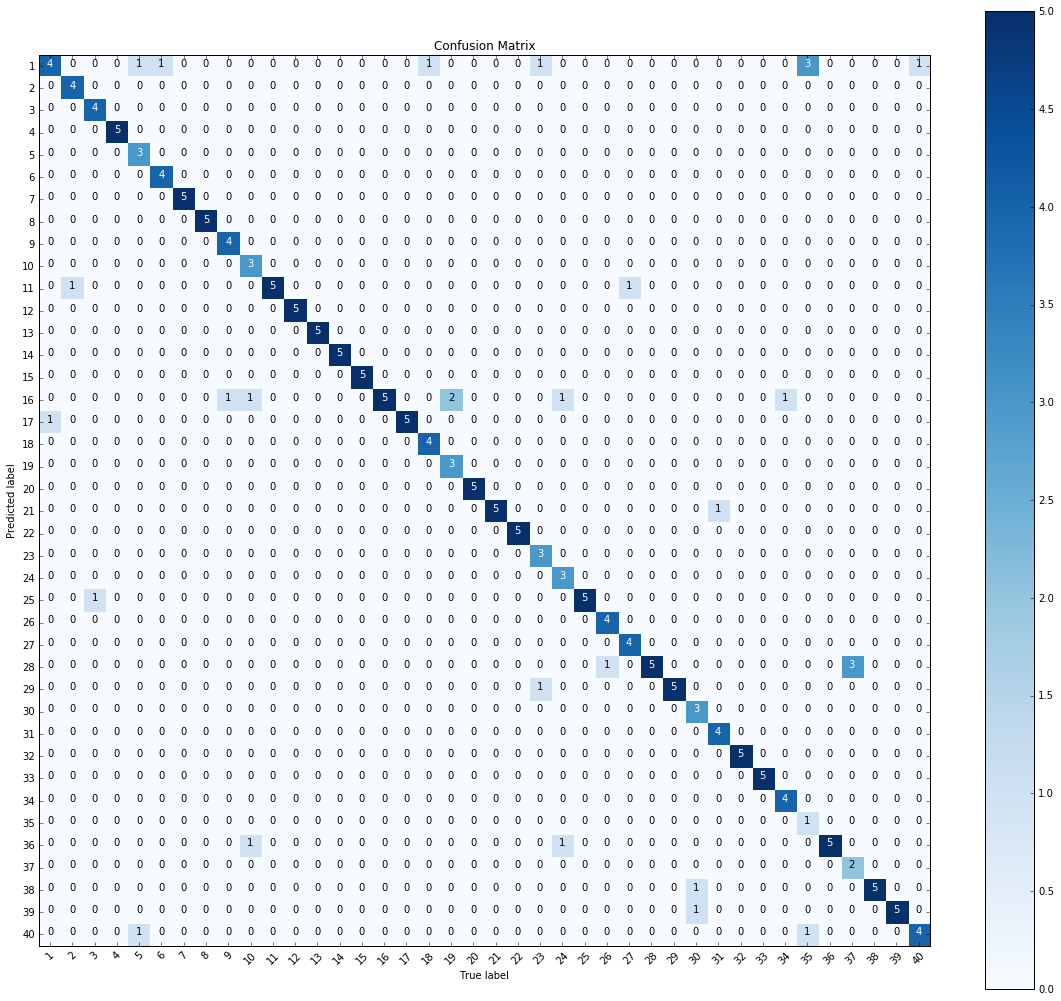

In [167]:
conf_after = np.delete(conf_matrix_after, 0, 0)
conf_after = np.delete(conf_after, 0, 1)
plot_confusion_matrix(conf_after, class_labels)

As we expected, the classification accuracy after projection is higher than that before the projection, because now each dimension represents an eigenface instead of just a pixel, which makes dimensions a more meaningful measure of comparing images. The confusion matrix is more concentrated in the diagonal now since the accuarcy has increased. We also notice that, like before projection, persons number 1 and 16 still somewhat confuses the classifier, but persons 28 and 36 no longer confuses the classifier as before.

## Question 3: Midterm 2 question

In [5]:
q3_data = np.array([[2,6],[3,5],[4,4],[5,3],[6,2],[6,4],[6,6],
        [8,4],[9,2],[9,3],[3,3],[4,3],[4,5],[5,5],[7,3],[7,4],
        [7,5],[7,2],[10,1],[10,3],[10,5],[11,3],[11,4],[12,2],[13,5]])
q3_data = q3_data.reshape(25, 2)

In [6]:
q3_labels = [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3]

In [7]:
data_1 = q3_data[0:10]
data_2 = q3_data[10:17]
data_3 = q3_data[17:25]

### prior probabilities

In [8]:
n = 25.0
n1 = 10
n2 = 7
n3 = 8
prior_1 = n1/n
prior_2 = n2/n
prior_3 = n3/n

### mean and covariance

In [11]:
mean_1 = np.mean(data_1, axis=0)
print(mean_1)

[5.8 3.9]


In [12]:
mean_2 = np.mean(data_2, axis=0)
print(mean_2)

[5.28571429 4.        ]


In [13]:
mean_3 = np.mean(data_3, axis=0)
print(mean_3)

[10.5    3.125]


In [14]:
cov_1 = (data_1-mean_1).T.dot(data_1-mean_1)/n1
print(cov_1)

[[ 5.16 -1.92]
 [-1.92  1.89]]


In [15]:
cov_2 = (data_2-mean_2).T.dot(data_2-mean_2)/n2
print(cov_2)

[[2.48979592 0.28571429]
 [0.28571429 0.85714286]]


In [16]:
cov_3 = (data_3-mean_3).T.dot(data_3-mean_3)/n3
print(cov_3)

[[2.75     0.9375  ]
 [0.9375   1.859375]]


### Full Bayes Classification

In [17]:
sp1 = np.array([6, 5])
sp2 = np.array([9, 4])
sp3 = np.array([8, 5])

In [20]:
def f(x, mean, covar):
    return exp(-1*((x-mean).T.dot(linalg.inv(covar)).dot(x-mean))/2)/(sqrt(2*pi)**len(mean)* sqrt(linalg.det(covar)))

In [23]:
p1 = f(sp1, mean_1, cov_1)*prior_1
print(p1)
p2 = f(sp1, mean_2, cov_2)*prior_2
print(p2)
p3 = f(sp1, mean_3, cov_3)*prior_3
print(p3)

0.014321090702774673
0.016839919333449322
1.4308614699395212e-05


the first sample $(6,5)$ is classified as the second class since `p2` is the largest probability

In [24]:
p1 = f(sp2, mean_1, cov_1)*prior_1
print(p1)
p2 = f(sp2, mean_2, cov_2)*prior_2
print(p2)
p3 = f(sp2, mean_3, cov_3)*prior_3
print(p3)

0.0047182901627762265
0.0017449166056990278
0.00880760654750708


the second sample $(9,4)$ is classified as the third class since `p3` is the largest probability

In [25]:
p1 = f(sp3, mean_1, cov_1)*prior_1
print(p1)
p2 = f(sp3, mean_2, cov_2)*prior_2
print(p2)
p3 = f(sp3, mean_3, cov_3)*prior_3
print(p3)

0.0033791310381719934
0.005313990861951303
0.0007097556976462525


the third sample $(8,5)$ is classified as the second class since `p2` is the largest probability

### naive bayes classification

In [212]:
var_1 = np.diag(cov_1)
var_2 = np.diag(cov_2)
var_3 = np.diag(cov_3)

In [213]:
q3_model = {}
q3_model[1] = (prior_1, mean_1, var_1)
q3_model[2] = (prior_2, mean_2, var_2)
q3_model[3] = (prior_3, mean_3, var_3)

We can use the `Naive_Classify()` method that we implemented earlier to classify the 3 points.

In [219]:
print "classified sample 1 as class {}".format(Naive_Classify(q3_model, sp1))
print "classified sample 1 as class {}".format(Naive_Classify(q3_model, sp2))
print "classified sample 1 as class {}".format(Naive_Classify(q3_model, sp3))

0.0152896866578948
0.0139371975544692
0.000220320259887943
classified sample 1 as class 1
0.00426963825108756
0.0074361721512879
0.0121770131525346
classified sample 1 as class 3
0.00724721053045382
0.00813438233065963
0.00280886779169209
classified sample 1 as class 2


### adding a new feature

I did not completely understand the question. (and I didn't have time to solve it to be honest :) )